- 합성곱신경망(Convolutional Neural Network, CNN)
    - 이미지 분석에 주로 사용되는 대표적 계층
 
    - 기존의 인공신경망에서의 이미지 분석시에는 높이와 너비를 1차원으로 사용
        - 합성곱신경망(CNN)은 원형 그대로의 이미지 높이와 너비 "2차원을 원본 그대로 사용"
   
    - 합성곱신경망(CNN)에서 훈련에 사용하는 차원은 4차원을 사용
        - 4차원 데이터 = (행의갯수, 이미지사이즈1, 이미지사이즈2, 채널)
        - 채널 : 이미지의 색상(흑백 또는 컬러)을 의미
            - 흑백은 1의 값, 컬러는 RGB의 3의 값을 사용합니다.
            - 흑백 => (행의갯수, 이미지사이즈1, 이미지사이즈2, 1)
            - 컬러 => (행의갯수, 이미지사이즈1, 이미지사이즈2, 3)
            
    - 우리가 사용하는 패션 이미지 데이터는 흑백 사진 픽셀 데이터
 
- 합성곱신경망(CNN)을 사용하는 이유
    - 기존 이미지 분석 시 높이와 너비를 곱하여 1차원으로 사용하게되면,
    * 원형 그대로의 주변 이미지 공간 정보를 활용하지 못하는 단점이 발생
    * 이러한 이유로 "특정 픽셀의 주변 특징 추출"을 잘 못함
        - 학습이 잘 이루어지지 않는 경우가 발생함


- 기존 인공신경망 모델의 단점을 보완하여 만들어진 계층이 -> CNN 계층
    * 원본 형태의 이미지 정보를 그대로 유지한 상태로 학습 가능한 계층임
    * 이미지의 공간("격자"라고 합니다. 픽셀이 아님) 정보를 나누어서 특징을 추출
    * 인접 이미지의 특징을 포함하여 훈련
 
- 합성곱신경망(CNN) 계층구조
    1. 입력계층 : 아래 2번, 3번, 5번은 입력계층으로 사용 가능
    2. 합성곱계층(CNN)
        - 이미지 특징을 추출하는 계층
    3. 활성화 함수 계층(은닉계층-Hidden Layer)
    4. 풀링계층(Pooling Layer)
        - 공간 크기를 줄이고 계산량을 감소시키기 위한 계층(중요 특징만 추출하는 계층)
        - 머신러닝에서 주성분분석(PCA)과 유사한 기능
        - 풀링방법 : 최대풀링(Max Pooling), 평균풀링(Average Pooling)이 있음
        - 주로 최대풀링(Max Pooling) 사용
    5. 완전 연결 계층(은니계층-Hidden Layer)
        - 추출된 특징을 이용해서 최종 예측 전 수행하는 계층
        - 이때는 기존의 방법과 동일하게 1차원(높이*너비)의 전처리 계층(Flatten)을 사용하는 경우도 있음(인공신경망 구조와 동일하게 진행)
    6. 출력계층
 
* CNN계층에서는 2~4번 계층구조가 일반적으로 사용되며 나머지 계층은 기존 인공신경망 구조를 따름
    - 2~4번 계층 셋트가 여러개 포함 될 수 있음

### 라이브러리 정의하기

In [1]:
### 텐서플로우 프레임워크(패키지)
import tensorflow as tf

### 케라스 라이브러리 
from tensorflow import keras

### 시각화 라이브러리
import matplotlib.pyplot as plt

### 넘파이
import numpy as np

### 데이터 분류
from sklearn.model_selection import train_test_split

### 딥러닝 랜덤 규칙
tf.keras.utils.set_random_seed(42)

### 사용할 데이터 불러들이기 - 패션 이미지

In [2]:
### 변수명 : train_input, train_target, test_input, test_target
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
    
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### CNN 처리를 위해서 독립변수의 차원을 4차원으로 변환하기

In [3]:
### 이미지 데이터가 흑백 or 컬러 확인하기
# - 마지막 차원의 값이 1개의 값으로 구성되어 있는지 3개의 값으로 구성되어 있는지 확인
train_input[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
### (갯수, 너비, 높이, 채널)의 4차원으로 변환
### (축, 행, 열, 채널)
# - 채널 : 흑백 이미지는 1의 값을, 컬러 이미지는 3의 값을 사용
# - 최종 차원 =  (축, 행, 열, 채널) = (60000, 28, 28, 1)
train_input_4d = train_input.reshape(-1, 28, 28, 1)

print(train_input_4d.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28) (10000,)


### 데이터 스케일링 처리하기

In [8]:
### 데이터를 0~1사이의 값으로 스케일링 처리하기
# - 데이터는 픽셀 데이터로 0~255까지의 데이터를 사용하고 있음
train_scaled = train_input_4d / 255.0
print(train_scaled.shape, train_target.shape)
print(train_scaled[1][0])

(60000, 28, 28, 1) (60000,)
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00392157]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.16078431]
 [0.7372549 ]
 [0.40392157]
 [0.21176471]
 [0.18823529]
 [0.16862745]
 [0.34117647]
 [0.65882353]
 [0.52156863]
 [0.0627451 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


### 훈련 : 검증 = 8 : 2로 분류하기

In [9]:
### 사용변수 : train_scaled, train_target, val_scaled, val_target
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [10]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


### 훈련모델 생성하기 : CNN 합성곱신경망 사용

In [11]:
### 모델 생성하기
model = keras.Sequential()
model

- 합성곱신경망(CNN) 계층 속성
    - CNN은 데이터(행열 원본 데이터)와 필터(filter, 행열)가 곱해진다고 해서 합성곱이라는 단어가 생겨남
    - 이미지와 같은 2차원(이미지 사이즈1 * 이미지 사이즈2) 데이터 분류에는 보통 2차원 합성곱(Conv2D) 사용
    - 입력 계층으로 사용하는 경우에는 input_shape() 사용
 
- kernel_size, 커널사이즈
    - 이미지를 훓으면서 특징을 추출하는 역할을 수행
    - 필터에서 사용할 사이즈를 정의함
    - kernel_size = 3의 의미 : 필터가 사용할 사이즈는 3행 3열로 특징 추출 진행
        - 3행 3열을 줄여서 3이라고 정의
    - kernel_size는 홀수로 정의 : 보통 3, 5, 7, 9..(주로 3, 5를 사용)
 
- filters, 필터
    - 데이터를 훓으면서(strides) 특징을 추출하는 역할을 함(필터링 개념)
    - 필터의 값이 클수록 훈련 속도가 오래 걸림
    - 보통 32, 64가 주로 사용됨
    - CNN계층을 여러개 사용하는 경우에는 처음 CNN계층에는 작은값부터 시작
        - 16, 32, 64, 128...정도가 주로  사용됨
    - 필터의 갯수는 해당 레이어에서의 출력 갯수가 됨
 
- padding, 패팅
    - 경계 처리 방식을 정의
    - 커널 사이즈에 대한 원본 사이즈가 부적합할 경우 주변 픽셀을 만들어서 사용하는 방법
    - 입력(이미지 높이 * 너비) 데이터의 주변에 추가되는 가상의 공간을 만듬
    - 패딩을 사용하지 않으면, 중복이 일어나지 않은 픽셀값들이 발생함(처음과 마지막 픽셀들)
        - 중복이 일어나지 않으면 특징 추출 시 정밀성이 떨어짐
        - 따라서 중복을 허용할 수 있도록 하기 위해 주변에 가상공간을 두어서 하는 경우가 있음
    - 처리 방식 : same과 valid가 있음
    * same : 패팅을 사용하여 입력과 출력의 크기를 동일하게 만들어서 훈련하고자 할때 사용
    * valid : 패팅을 사용하지 않음을 의미함
    * same을 주로 사용하도록 권장하고 있음
 
- strides, 스트라이드
    - 커널 사이즈에 해당하는 필터가 이미지 데이터의 특징을 추출하기 위해 이동하는 간격 정의
    - 특징 추출을 위한 이동 순서 : 왼쪽에서 -> 오른쪽, 위에서 -> 아래로
    - strides=1의 의미 : 오른쪽으로 1씩, 아래로 1씩 이동한다는 의미

In [12]:
### 입력계층 추가하기 : 합성곱신경망(CNN) 계층을 입력으로 사용
model.add(
    # Conv2D : 2D는 이미지 높이, 너비의 2차원을 의미함
    keras.layers.Conv2D(
        kernel_size = 3,
        filters = 32,
        # CNN에서는 주로 relu를 사용
        activation = "relu",
        padding = "same",
        strides = 1,
        # (행, 열, 채널)을 사용
        input_shape = (28, 28, 1)
    )
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


### 풀링계층(Pooling Layer) 추가하기

- 풀링계층(Pooling Layer)
    - CNN 계층 추가 이후에 일반적으로 함께 사용되는 계층
    - CNN 계층에서 추출된 특징들 중에 "중요한 정보만을 추출"하는 계층
    - 머신러닝의 주성분분석(PCA)과 유사한 개념
    - 이미지를 구성하는 픽셀들이, 주변 픽셀들끼리는 유사한 정보를 가진다는 개념에서 접근
    - 중복된 값들이나 유사한 값들을 대표하는 값들, 즉 중요한 특징을 가지는 값들만 추출
    - "과적합 방지에 효율적"으로 사용되며 훈련에 참여하지는 않는 "전처리 계층"
 
- MaxPool2D
    - 사소한 값들(특징이 약한 값들)은 무시하고, 최대값의 특징들만 추출하는 방식
    - pool_size=2 : 2행 2열의 공간에 중요 특징들만 저장하라는 의미
    - strides=2 : CNN에서 추출한 특징값들은 행렬 구조 데이터 
        - 2행2열의 공간을 이용하여 오른쪽으로 2칸씩, 아래로 2칸씩 움직이면서 추출
        - 디폴트(기본값)은 2
    - 풀링 계층에서 대표적으로 사용되는 계층

In [14]:
model.add(
    keras.layers.MaxPool2D(pool_size=2, strides=2)
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


### CNN 계층 또 추가하기

In [18]:
model.add(
    keras.layers.Conv2D(
        kernel_size = (3, 3),
        filters = 64,
        activation = "relu",
        padding = "same",
        strides = 1
    )
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [20]:
### Pooling 레이어 추가
model.add(
    keras.layers.MaxPool2D(pool_size=2, strides=2)
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


### 심층신경망(DNN)을 이용해서 최종 결과 도출 계층 생성하기

In [ ]:
# 1. 1차원 전처리 계층 추가하기
#    : 이전 계층의 출력값을 입력으로 받아서 자동으로 1차원으로 만들어줌
# 2. 은닉계층 추가하기 : 출력갯수 100개, 활성화함수 relu
# 3. 일부 특성 제외하기 위한 계층 추가 : 20% 훈련에서 제외
# 4. 출력계층 추가하기

In [ ]:
# 1. 1차원 전처리 계층 추가하기
#    : 이전 계층의 출력값을 입력으로 받아서 자동으로 1차원으로 만들어줌
model.add(keras.layers.Flatten())

In [23]:
# 2. 은닉계층 추가하기 : 출력갯수 100개, 활성화함수 relu
model.add(keras.layers.Dense(units=100, activation="relu"))

In [24]:
# 3. 일부 특성 제외하기 위한 전처리 계층 추가(훈련에 관여하지 않음) : 20% 훈련에서 제외
model.add(keras.layers.Dropout(0.2))

In [25]:
# 4. 출력계층 추가하기
model.add(keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
model.summary()


# <CNN 계층에서 Param 계산 공식>
#  * conv2d (Conv2D) -> Param = 320
#   - 필터 1개에 대한 Param 먼저 계산
#     = (커널너비 * 커널높이 * 입력채널(원본 채널색상)) + 1
#     = (3 * 3 * 1) + 1 = 10
#   - 전체 필터 갯수에 대한 Param 계산
#     = 전체 필터 갯수 * 1개 필터 Param값
#     = 32 * 10 = 320
   
#  * conv2d_1 (Conv2D) -> Param = 18,496
#   - 필터 1개에 대한 Param 먼저 계산
#     = (커널너비 * 커널높이 * 입력채널(이전계층의 필터갯수와 같음)) + 1
#     = (3 * 3 * 32) + 1 = 289
#   - 전체 필터 갯수에 대한 Param 계산
#     = 전체 필터 갯수 * 1개 필터 Param값
#     = 64 * 289 = 18,496

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

### 모델 환경설정(compile) 하기

In [ ]:
# - 옵티마이저 : adam 사용
# - 손실함수 추가
# - 훈련시 정확도 확인시켜주기

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

### 콜백함수 정의하기

In [ ]:
### 콜백함수 추가하기
# 저장위치 : model
# 저장 파일명 : best_cnn_fashion_model.h5
# 자동종료 확인 횟수 : 2회

### 자동저장 콜백함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_cnn_fashion_model.h5")

### 자동종료 콜백함수
# - restore_best_weights=True : 종료시점에 최적의 가중치로 model 업데이트하라는 옵션
earlystopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

checkpoint_cb, earlystopping_cb

(<keras.callbacks.ModelCheckpoint at 0x1e817d8b2b0>,
 <keras.callbacks.EarlyStopping at 0x1e817d8ba90>)

### 훈련시키기

In [ ]:
# - 훈련데이터와 검증데이터를 사용하여 훈련시키기
# - 훈련횟수 : 1000회
# - 훈련 시 콜백함수 적용
# - 훈련결과를 history 변수에 담기

# <커널이 작동안하는 경우 CPU로 처리>
# with tf.device("/CPU:0") :
#     history = model.fit(
#         train_scaled, train_target, epochs=1000,
#         validation_data=(val_scaled, val_target),
#         callbacks=[checkpoint_cb, earlystopping_cb]
# )


history = model.fit(
    train_scaled, train_target, epochs=1000,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/1000
1500/1500 [==============================] - 23s 9ms/step - loss: 0.4787 - accuracy: 0.8281 - val_loss: 0.3203 - val_accuracy: 0.8817
Epoch 2/1000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3138 - accuracy: 0.8848 - val_loss: 0.2702 - val_accuracy: 0.8997
Epoch 3/1000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2656 - accuracy: 0.9019 - val_loss: 0.2429 - val_accuracy: 0.9103
Epoch 4/1000
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2329 - accuracy: 0.9136 - val_loss: 0.2320 - val_accuracy: 0.9148
Epoch 5/1000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2036 - accuracy: 0.9237 - val_loss: 0.2235 - val_accuracy: 0.9199
Epoch 6/1000
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1816 - accuracy: 0.9329 - val_loss: 0.2195 - val_accuracy: 0.9200
Epoch 7/1000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1631 - accuracy: 0.9389 - val_loss: 0

- 딥러닝에서 주로 사용되는 숫자들
    - 사이즈(행렬)를 나타내는 크기값 : 3, 5를 주로 사용
    - 커널 등 갯수를 나타내는 값 : 16, 32, 64, 128로 계층이 추가될때 증가하면서 사용
    - 이동을 나타내는 값 : 1, 2를 주로 사용(오른쪽으로 1씩/아래로 1씩, 또는 2씩)

### 훈련 vs 검증에 대한 손실율 곡선 그리기

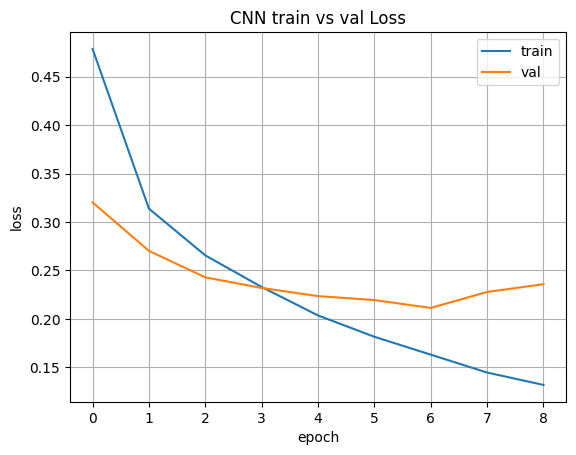

In [33]:
plt.title("CNN train vs val Loss")
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])

plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend(["train", "val"])
plt.grid()
plt.show()

### 훈련 vs 검증의 정확도 비교 곡선 그리기

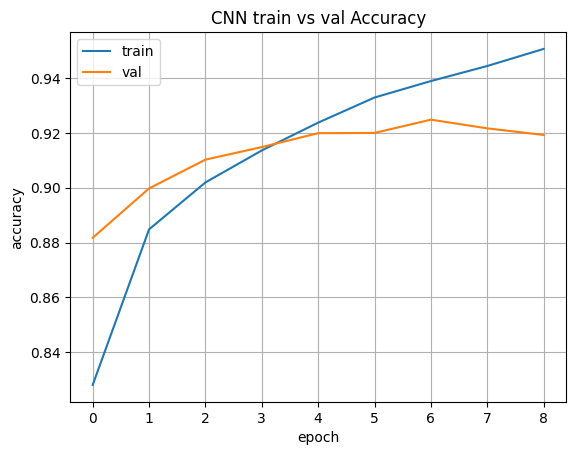

In [34]:
plt.title("CNN train vs val Accuracy")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend(["train", "val"])
plt.grid()
plt.show()

### 성능 검증(evaluate)하기

In [36]:
### 최종 성능 검증 결과 확인하기
# 최적의 저장된 모델 불러들이기
best_model = keras.models.load_model("./model/best_cnn_fashion_model.h5")

# 훈련데이터를 이용한 손실 및 정확도 확인하기
train_score = best_model.evaluate(train_scaled, train_target)

# 검증데이터를 이용한 손실 및 정확도 확인하기
val_score = best_model.evaluate(val_scaled, val_target)

print(f"훈련손실율 : {train_score[0]}, 훈련정확도 : {train_score[1]}")
print(f"검증손실율 : {val_score[0]}, 검증정확도 : {val_score[1]}")


375/375 [==============================] - 1s 2ms/step - loss: 0.2358 - accuracy: 0.9193
훈련손실율 : 0.09892214089632034, 훈련정확도 : 0.964020848274231
검증손실율 : 0.23583629727363586, 검증정확도 : 0.9192500114440918


### 훈련에 사용된 데이터를 이미지로 그리기

In [ ]:
### 검증 데이터 1개 이미지로 그려보기
# - 훈련에 사용한 데이터를 이미지로 그리기 위해서는 원본 차원으로 변환해야 함
val_scaled[0]

# - 훈련에 사용된 데이터 차원은 (28, 28, 1) : 3차원
val_scaled[0].shape 

### 원본 데이터의 차원은 (28, 28) : 2차원
# - 0번째 이미지 데이터를 2차원으로 변환하기
val_scaled_0 = val_scaled[0].reshape(28, 28)
val_scaled_0.shape

(28, 28)

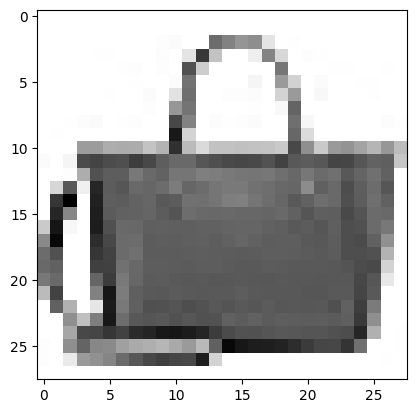

In [ ]:
### 0번째 이미지데이터를 이용해서 이미지로 시각화
# plt.imshow(val_scaled_0)

# - cmap="gray_r" : 색상 반전(바탕은 흰색으로, 이미지가 있는 부분은 회색으로)
plt.imshow(val_scaled_0, cmap="gray_r")
plt.show()

In [ ]:
### 검증데이터의 0번째 종속변수의 정답 확인하기
# - 가방 : 8번
val_target[0]

8

### 예측하기

In [ ]:
### 검증 데이터의 0번째 데이터를 이용하여 예측하기
# - 0번째 검증데이터 추출하기
val_scaled[ : 1]

### 예측하기
val_pred_0 = best_model.predict(val_scaled[:1])
val_pred_0

array([[1.4923840e-16, 1.9329571e-28, 5.7412670e-24, 8.9349012e-21,
        3.0889178e-19, 2.6729337e-16, 1.0971277e-18, 6.6802194e-15,
        1.0000000e+00, 1.0474114e-15]], dtype=float32)

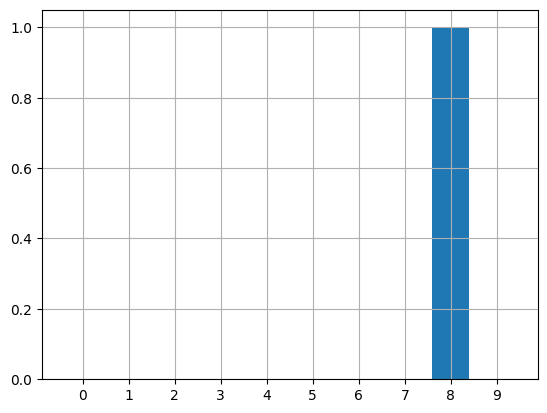

In [54]:
### 검증데이터 0번째 예측 결과에 대한 10개 확률결과를 막대그래프로 그리기
# - x축은 인덱스번호
# - y축은 확률값

plt.bar(range(len(val_pred_0[0])), val_pred_0[0])
plt.xticks(range(len(val_pred_0[0])))
plt.grid()
plt.show()

In [55]:
### 종속변수의 범주 명칭
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트",
           "샌달", "셔츠", "스니커즈", "가방", "앵클부츠"]
classes

['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

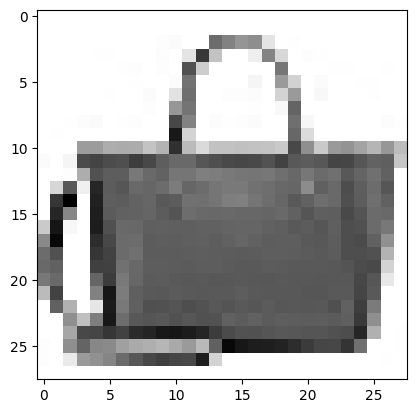

예측값 : 8
예측값(한글명) : 가방
실제값(한글명) : 가방


In [ ]:
### 검증데이터 0번째에 대한 이미지, 예측값, 예측값(한글명), 실제값(한글명) 출력
plt.imshow(val_scaled_0, cmap="gray_r")
plt.show()

print(f"예측값 : {np.argmax(val_pred_0)}")
print(f"예측값(한글명) : {classes[np.argmax(val_pred_0)]}")
print(f"실제값(한글명) : {classes[val_target[0]]}")

### 테스트 데이터로 예측하기

- 전체 테스트 데이터를 이용해서 예측하기
- 예측 결과 중 10개 데이터만 추출
- 10개 각각 예측결과에 대해
   - 실제 이미지그리기(이미지 사이즈는 (2, 2) 사용)
   - 예측값/예측값(한글명)/실제값(한글명) 출력하기

In [ ]:
### 테스트 데이터를 4차원 데이터로 변환 후 스케일링 처리를 해야 함
# --> 예측을 위해서
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled.shape

(10000, 28, 28, 1)

In [60]:
### 테스트 데이터 전체로 예측하기
test_pred = model.predict(test_scaled)
test_pred.shape

(10000, 10)

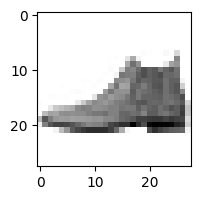

예측값 : 9
예측값(한글명) : 앵클부츠
실제값(한글명) : 앵클부츠


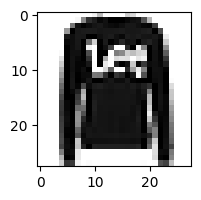

예측값 : 2
예측값(한글명) : 스웨터
실제값(한글명) : 스웨터


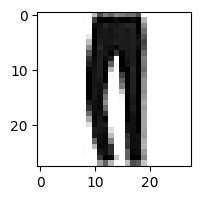

예측값 : 1
예측값(한글명) : 바지
실제값(한글명) : 바지


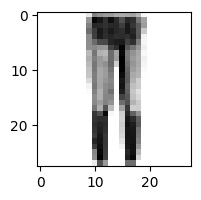

예측값 : 1
예측값(한글명) : 바지
실제값(한글명) : 바지


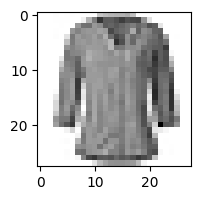

예측값 : 6
예측값(한글명) : 셔츠
실제값(한글명) : 셔츠


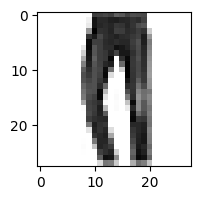

예측값 : 1
예측값(한글명) : 바지
실제값(한글명) : 바지


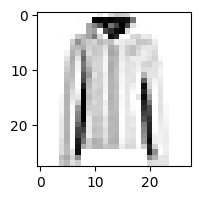

예측값 : 4
예측값(한글명) : 코트
실제값(한글명) : 코트


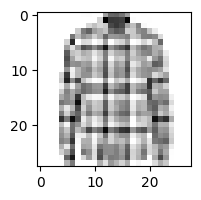

예측값 : 6
예측값(한글명) : 셔츠
실제값(한글명) : 셔츠


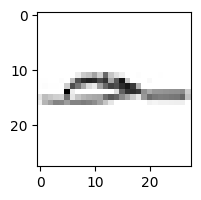

예측값 : 5
예측값(한글명) : 샌달
실제값(한글명) : 샌달


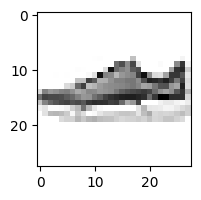

예측값 : 7
예측값(한글명) : 스니커즈
실제값(한글명) : 스니커즈


In [61]:
### 예측결과 상위10개에 대해서만 출력
for i in range(10) :
    # 이미지 사이즈 지정
    plt.figure(figsize=(2, 2))
    
    # 이미지 2차원으로 변환 수 시각화
    plt.imshow(test_scaled[i].reshape(28, 28), cmap="gray_r")
    plt.show()
    
    # 예측값, 예측값(한글), 실제값(한글) 출력하기
    print(f"예측값 : {np.argmax(test_pred[i])}")
    print(f"예측값(한글명) : {classes[np.argmax(test_pred[i])]}")
    print(f"실제값(한글명) : {classes[test_target[i]]}")
    